In [1]:
from pathlib import Path

from pycocotools.coco import COCO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
ann_file = "../dataset/COCO/annotations/instances_train2014.json"
img_dir = "../dataset/COCO/train2014/"
coco = COCO(ann_file)

loading annotations into memory...
Done (t=9.44s)
creating index...
index created!


In [3]:
categories = coco.loadCats(coco.getCatIds())
# for category in categories:
#     print(category['name'])
print(len(categories))

80


In [13]:
# imgIds = coco.getImgIds()

for category in categories:
    catNm = category['name']
    catId = coco.getCatIds(catNms=catNm)
    imgIds = coco.getImgIds(catIds=catId)
    print(catNm, len(imgIds))

person 21634
bicycle 1114
car 4180
motorcycle 1219
airplane 840
bus 1350
train 1281
truck 2056
boat 1048
traffic light 1437
fire hydrant 592
stop sign 589
parking meter 261
bench 1961
bird 1121
cat 1480
dog 1521
horse 1001
sheep 489
cow 666
elephant 714
bear 341
zebra 677
giraffe 849
backpack 1832
umbrella 1393
handbag 2272
tie 1288
suitcase 876
frisbee 757
skis 993
snowboard 533
sports ball 1445
kite 727
baseball bat 799
baseball glove 845
skateboard 1092
surfboard 1292
tennis racket 1193
bottle 2912
wine glass 872
cup 3061
fork 1173
knife 1410
spoon 1189
bowl 2397
banana 728
apple 491
sandwich 818
orange 568
broccoli 670
carrot 11
hot dog 4
pizza 1117
donut 523
cake 969
chair 4404
couch 1448
potted plant 1540
bed 1292
dining table 3960
toilet 1185
tv 1577
laptop 1232
mouse 674
remote 1041
keyboard 750
cell phone 1695
microwave 512
oven 989
toaster 74
sink 1574
refrigerator 790
book 1828
clock 1704
vase 1200
scissors 302
teddy bear 6
hair drier 70
toothbrush 341


In [28]:
catId = coco.getCatIds(catNms=['bicycle', 'airplane'])
imgIds = coco.getImgIds(catIds=catId)
images = coco.loadImgs(imgIds)
coco.loadCats([1])
print(type(catId[0]))
# coco.loadAnns(coco.getAnnIds(imgIds=imgIds[0])[0])
for ann in coco.loadAnns(coco.getAnnIds(imgIds=imgIds[0])):
    print(type(ann['bbox']))
    print(type(ann['category_id']))
    break

<class 'int'>
<class 'list'>
<class 'int'>


In [33]:
catIds = coco.getCatIds(catNms=["bicycle", "airplane"])
imgIds = coco.getImgIds(catIds=catIds)
img_id = imgIds[0]
labels = []
bboxes = []
for ann in coco.loadAnns(coco.getAnnIds(imgIds=img_id)):
    catId = ann['category_id']
    if catId in catIds:
        labels.append(catIds.index(catId)) # TODO: refactor 毎回indexで検索するのは遅い?->dict
        bboxes.append(ann['bbox'])
        
print(labels)        
print(bboxes)

[0, 1]
[[359.05, 299.7, 63.59, 65.19], [569.93, 153.6, 6.39, 3.3]]


In [50]:
img = np.asarray(Image.open(Path(img_dir) / Path(images[0]['file_name'])))
print(images[0]['file_name'], img.shape)

COCO_train2014_000000196610.jpg (640, 480, 3)


In [23]:
cat = categories[0]
print(cat)
catIds = coco.getCatIds(catIds=[categories[0]['id'], categories[1]['id']])
imgs = coco.getImgIds(catIds=catIds)
len(imgs)

{'supercategory': 'person', 'id': 1, 'name': 'person'}


1890

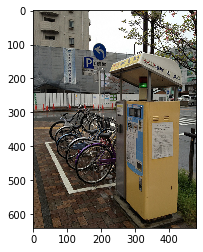

In [29]:
plt.imshow(img)
plt.show()